# 1. Mounting virtual drive

In [97]:
#from google.colab import drive
#drive.mount('/content/drive')

# 2. Installing libraries

In [98]:
!pip install handcalcs

In [99]:
!pip install --upgrade gspread

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)


# 3. Importing libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import handcalcs.render

# 4. Loading dataset

## 4.1 Option 1: Uploading a CSV file

In [101]:
#df = pd.read_csv('/content/drive/MyDrive/world_happiness_dataset.csv')
#df.head()

## 4.2 Option 2: Importing data from a Google Sheet

### 4.2.1 Authenticating Google Cloud SDK account

In [102]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

### 4.2.2 Fetching data using the Google Sheet URL

In [103]:
url = 'https://docs.google.com/spreadsheets/d/1tUllYIBOGpJfFUSNGz4SPGUI6NOnRYb4KRCGSt0elJw/edit#gid=0'

# You can open a spreadsheet by its title as it appears in Google Docs
#sh = gc.open('NW') # <-- Look ma, no keys!

# If you want to be specific, use a key (which can be extracted from
# the spreadsheet's url)
#sht1 = gc.open_by_key('0BmgG6nO_6dprdS1MN3d3MkdPa142WFRrdnRRUWl1UFE')

# Or, if you feel really lazy to extract that key, paste the entire url
sheet = gc.open_by_url(url)

# Select worksheet by index. Worksheet indexes start from zero
#worksheet = sh.get_worksheet(0)

# By title
worksheet = sheet.worksheet("Sheet1")
#val = worksheet.cell(1, 1).value

# Most common case: Sheet1
#worksheet = sh.sheet1

# Get a list of all worksheets
#worksheet_list = sh.worksheets()

In [104]:
#Extract all values in the sheet in a matrix format
list_of_lists = worksheet.get_all_values()

df = pd.DataFrame(list_of_lists)
df.columns = df.iloc[0,:]
df = df.drop(0)
df.index = range(df.shape[0])
print (df.head())

0 Overall rank Country or region  ... Generosity Perceptions of corruption
0            1           Finland  ...      0.153                     0.393
1            2           Denmark  ...      0.252                      0.41
2            3            Norway  ...      0.271                     0.341
3            4           Iceland  ...      0.354                     0.118
4            5       Netherlands  ...      0.322                     0.298

[5 rows x 9 columns]


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Overall rank                  156 non-null    object
 1   Country or region             156 non-null    object
 2   Score                         156 non-null    object
 3   GDP per capita                156 non-null    object
 4   Social support                156 non-null    object
 5   Healthy life expectancy       156 non-null    object
 6   Freedom to make life choices  156 non-null    object
 7   Generosity                    156 non-null    object
 8   Perceptions of corruption     156 non-null    object
dtypes: object(9)
memory usage: 11.1+ KB


In [106]:
df.describe()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156,156,156,156,156,156,156,156,156
unique,156,156,155,146,145,119,130,118,113
top,50,Tunisia,5.208,0.96,1.465,0.815,0.557,0.153,0.078
freq,1,1,2,3,3,5,3,4,4


In [107]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.6,1.383,1.573,0.996,0.592,0.252,0.41
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.38,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# 6. Cleaning

In [108]:
df.rename(columns={"Country or region":"Country"},inplace=True)
df.head() 

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.6,1.383,1.573,0.996,0.592,0.252,0.41
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.38,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [109]:
df_clean = df.drop('Country',axis=1)
for i in df_clean.columns:
  df_clean[i] = list(map(float,df_clean[i]))
df = df[['Country']].join(df_clean)

In [110]:
df.head()

,Country,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1.0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,5.0,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# 5. Exploratory data analysis

## 5.1 Univariate analysis

#### *5.1.1 Score*

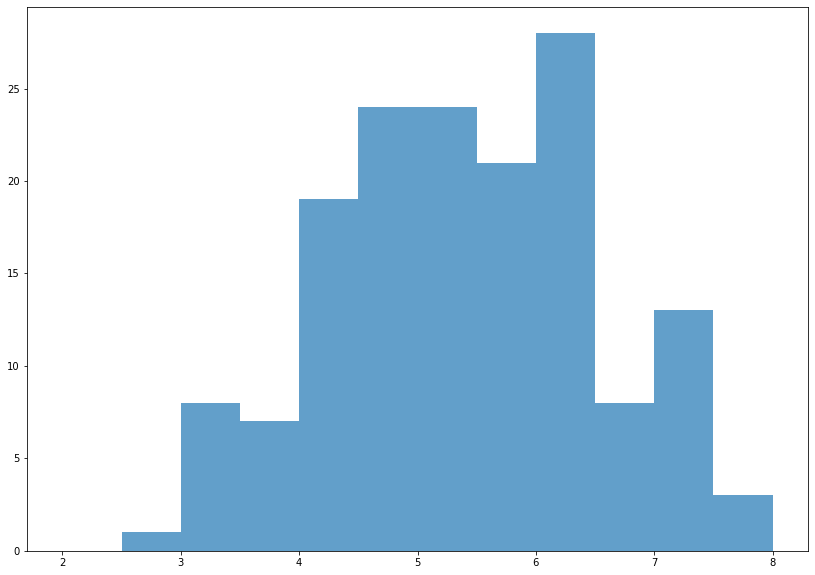

In [111]:
plt.figure(figsize=(14,10))
plt.hist(df['Score'],range=(2,8),bins=(12),alpha=0.7)
plt.show()

#### *5.1.2 GDP per capita*

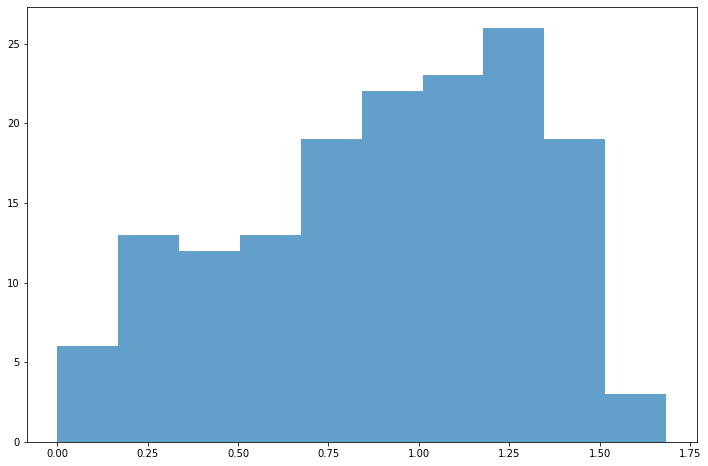

In [112]:
plt.figure(figsize=(12,8))
plt.hist(df['GDP per capita'],alpha=0.7)
plt.show()

#### *5.1.3 Healthy life expectancy*

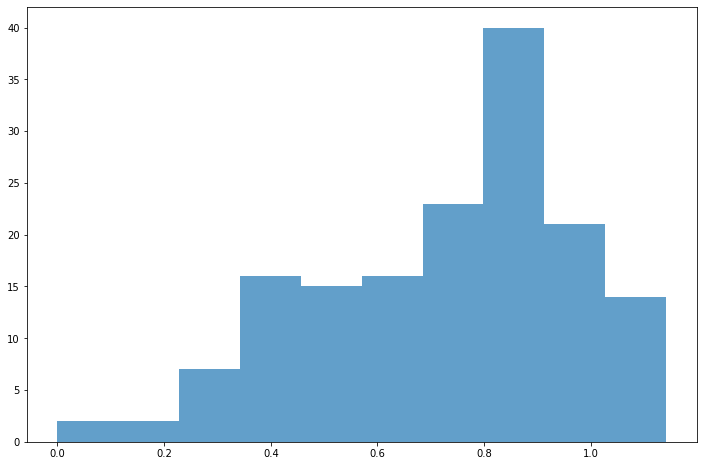

In [113]:
plt.figure(figsize=(12,8))
plt.hist(df['Healthy life expectancy'],alpha=0.7)
plt.show()

#### *5.1.4 Freedom to make life choices*

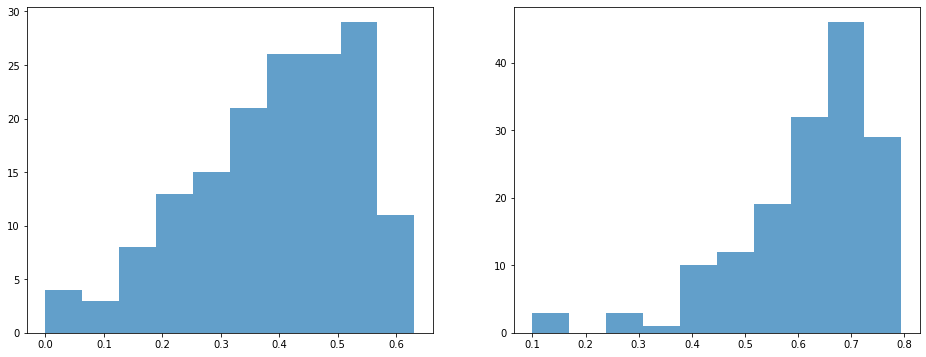

In [114]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.hist(df['Freedom to make life choices'],alpha=0.7)
df = df[df['Freedom to make life choices']!=0]
plt.subplot(1,2,2)
plt.hist(np.sqrt(df['Freedom to make life choices']),alpha=0.7)
plt.show()

#### *5.1.5 Generosity*

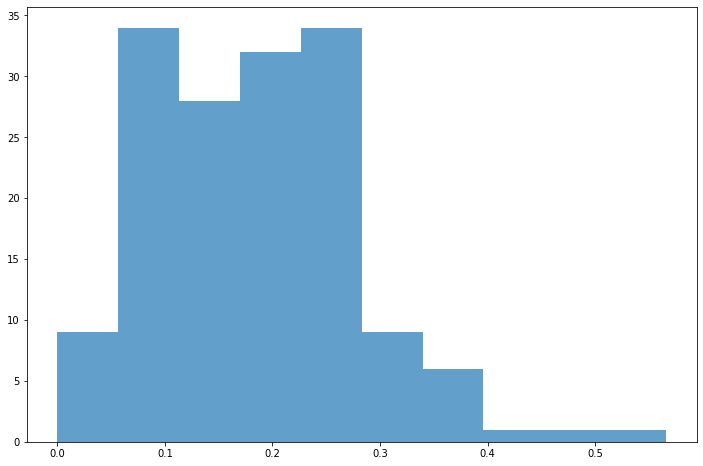

In [115]:
plt.figure(figsize=(12,8))
plt.hist(df['Generosity'],alpha=0.7)
plt.show()

#### *5.1.6 Perceptions of corruption*

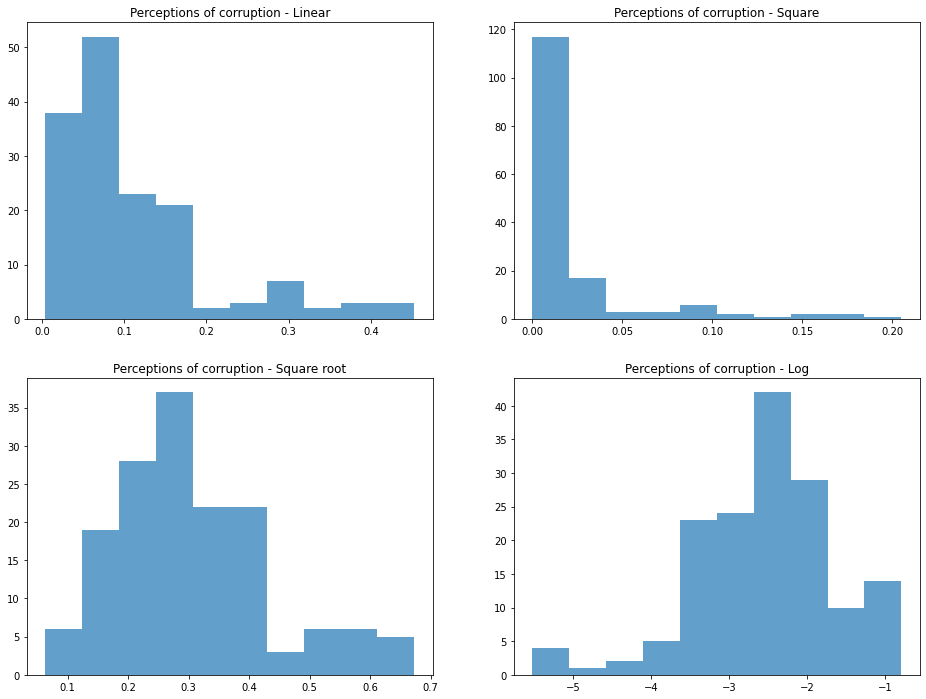

In [126]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.hist(df['Perceptions of corruption'],alpha=0.7)
plt.title('Perceptions of corruption - Linear')
plt.subplot(2,2,2)
plt.hist(np.square(df['Perceptions of corruption'].dropna()),alpha=0.7)
plt.title('Perceptions of corruption - Square')
plt.subplot(2,2,3)
plt.hist(np.sqrt(df['Perceptions of corruption']),alpha=0.7)
plt.title('Perceptions of corruption - Square root')
plt.subplot(2,2,4)
df = df[df['Perceptions of corruption']!=0]
plt.hist(np.log(df['Perceptions of corruption']),alpha=0.7)
plt.title('Perceptions of corruption - Log')

plt.show()

## 5.2 Bivariate analysis

Text(0.5, 1.05, 'Correlation Matrix')

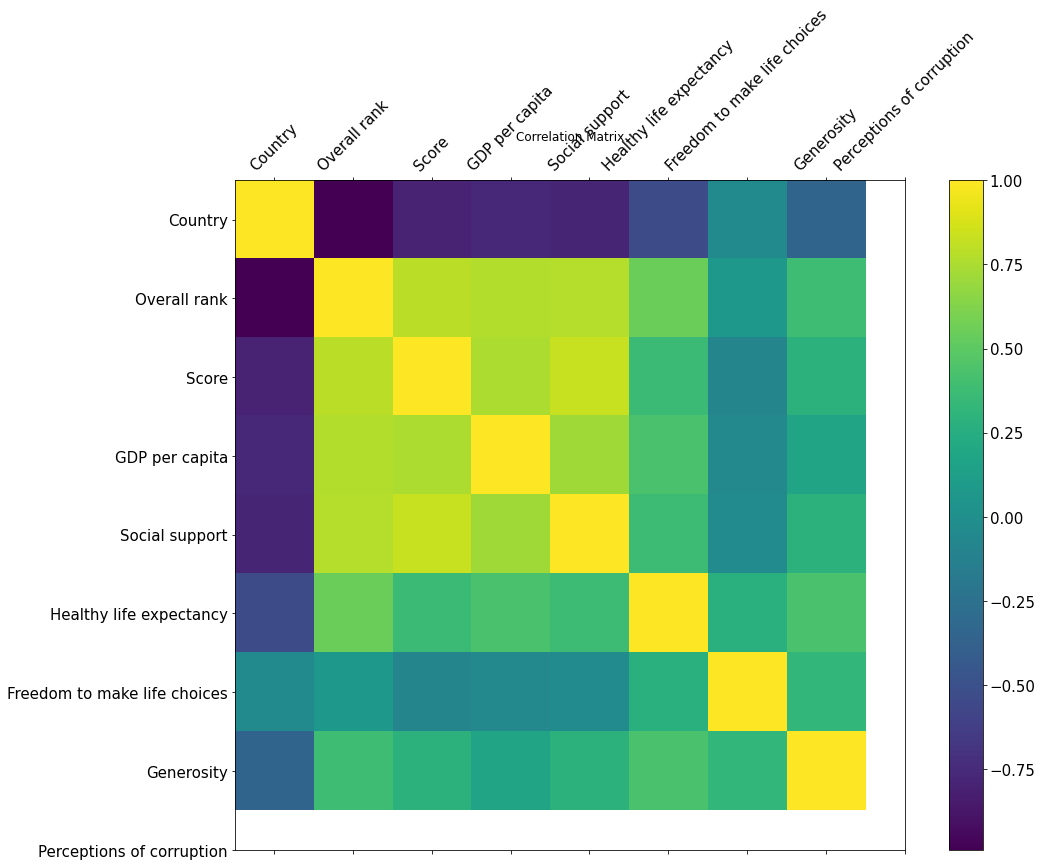

In [117]:
plt.figure(figsize=(16,12))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=15, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=15)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=15)
plt.title('Correlation Matrix', fontsize=12)

In [118]:
df.corr().style.background_gradient()

0,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,,,,,,,,
Overall rank,1.000000,-0.989187,-0.800581,-0.762593,-0.783976,-0.537978,-0.045406,-0.349006
Score,-0.989187,1.000000,0.792246,0.770677,0.776135,0.554818,0.073185,0.382328
GDP per capita,-0.800581,0.792246,1.000000,0.754409,0.834272,0.363362,-0.082998,0.290647
Social support,-0.762593,0.770677,0.754409,1.000000,0.714340,0.428439,-0.053225,0.175631
Healthy life expectancy,-0.783976,0.776135,0.834272,0.714340,1.000000,0.377351,-0.032499,0.291019
Freedom to make life choices,-0.537978,0.554818,0.363362,0.428439,0.377351,1.000000,0.272224,0.429916
Generosity,-0.045406,0.073185,-0.082998,-0.053225,-0.032499,0.272224,1.000000,0.326990
Perceptions of corruption,-0.349006,0.382328,0.290647,0.175631,0.291019,0.429916,0.326990,1.000000


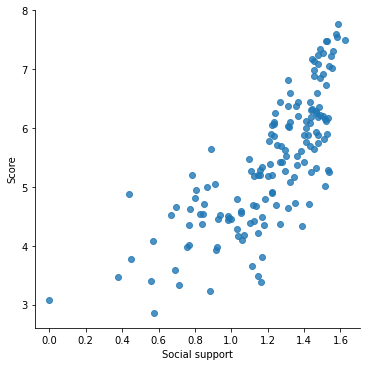

In [119]:
sns.lmplot(data=df,x='Social support',y='Score',fit_reg=False)

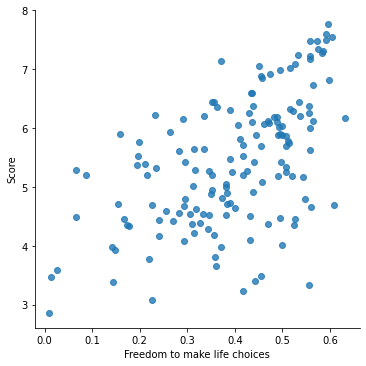

In [120]:
sns.lmplot(data=df,x='Freedom to make life choices',y='Score',fit_reg=False)

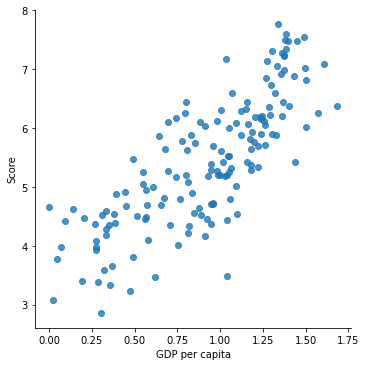

In [121]:
sns.lmplot(data=df,x='GDP per capita',y='Score',fit_reg=False)

0.3823279250102989
0.2234821143951729


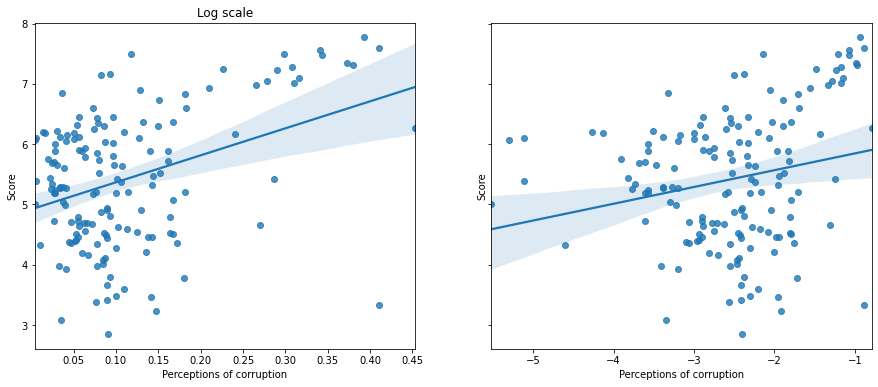

In [122]:
fig,axes = plt.subplots(1,2,sharey=True,figsize=(15,6))
sns.regplot(ax=axes[0],x=df['Perceptions of corruption'],y=df['Score'],fit_reg=True)
axes[0].set_title('Original scale')
sns.regplot(ax=axes[1],x=np.log(df['Perceptions of corruption']),y=df['Score'],fit_reg=True)
axes[0].set_title('Log scale')


print (np.corrcoef(df['Score'],df['Perceptions of corruption'])[0][1])
print (np.corrcoef(df['Score'],np.log(df['Perceptions of corruption']))[0][1])

We can see above that even after applying a log transformation to the *Perceptions of corruption* variable, the correlation with the *Score* variable is poor. 

The transformation resolved the skewness to a good extent but that doesn't necessarily solve the correlation issue. 

In [123]:
df_sort_happy = df.sort_values("Score",ascending=False)
print (df_sort_happy[['Country','Score']][:30])

0                Country  Score
0                Finland  7.769
1                Denmark  7.600
2                 Norway  7.554
3                Iceland  7.494
4            Netherlands  7.488
5            Switzerland  7.480
6                 Sweden  7.343
7            New Zealand  7.307
8                 Canada  7.278
9                Austria  7.246
10             Australia  7.228
11            Costa Rica  7.167
12                Israel  7.139
13            Luxembourg  7.090
14        United Kingdom  7.054
15               Ireland  7.021
16               Germany  6.985
17               Belgium  6.923
18         United States  6.892
19        Czech Republic  6.852
20  United Arab Emirates  6.825
21                 Malta  6.726
22                Mexico  6.595
23                France  6.592
24                Taiwan  6.446
25                 Chile  6.444
26             Guatemala  6.436
27          Saudi Arabia  6.375
28                 Qatar  6.374
29                 Spain  6.354


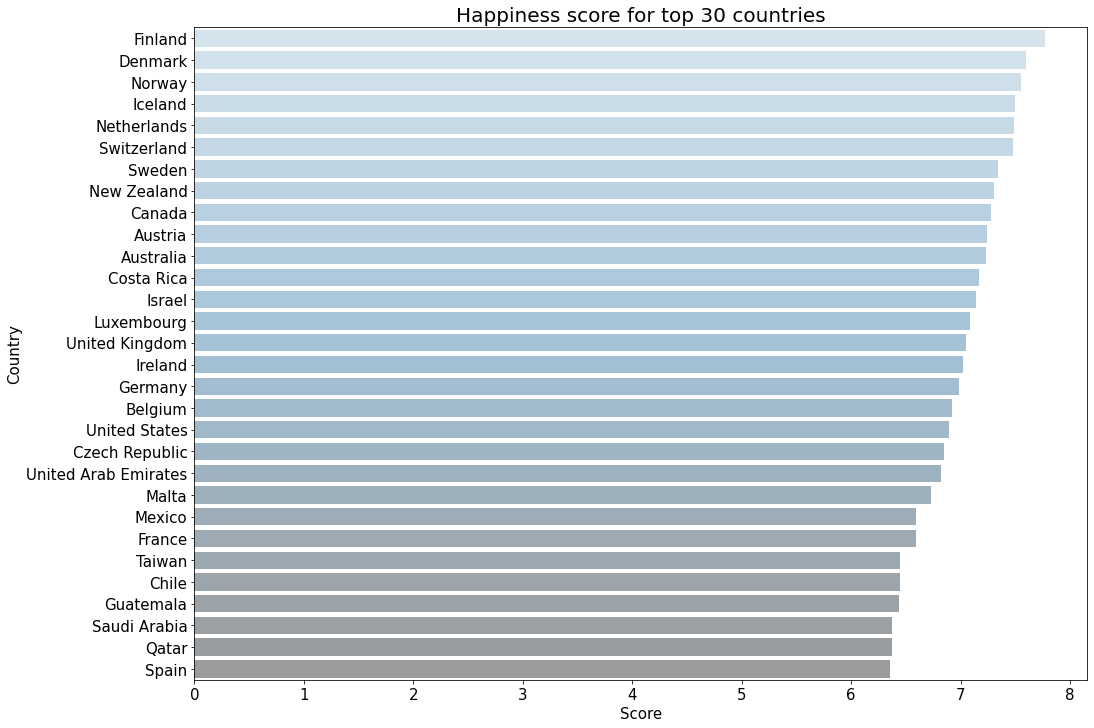

In [124]:
plt.figure(figsize=(16,12))
sns.barplot(y='Country',x='Score',data=df_sort_happy[:30],palette='Blues_d',alpha=0.5)
plt.xlabel('Score',size=15)
plt.ylabel('Country',size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Happiness score for top 30 countries',size=20)
plt.show()

# Clustering